# 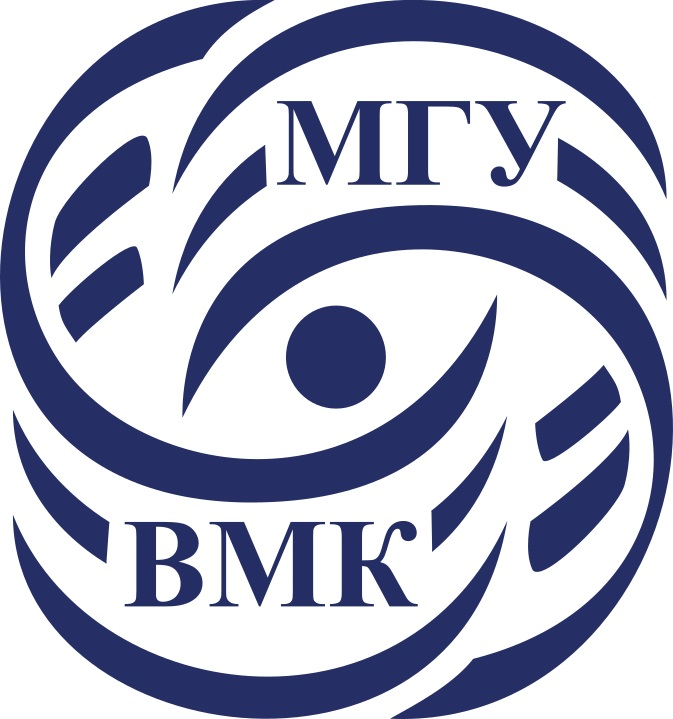

# Машинное обучение. ВМК МГУ

## Практическое задание 3: Knn: классификация и регрессия

### Важно! О формате сдачи

* Все задания, кроме двух на реализацию кода, в этой части оцениваются по системе <font color='red'>кросс-рецензирования.</font>
* При решении ноутбука <font color='red'>используйте данный шаблон.</font> Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий. Добавлять свои ячейки, при необходимости, конечно можно
* Везде, где в формулировке задания есть <font color='red'>какой-либо вопрос (или просьба вывода)</font>, необходимо прописать ответ в ячейку (код или markdown).
* Наличие <font color='red'>кода решения обязательно.</font> Письменные ответы на вопросы без сопутствующего кода оцениваются в 0 баллов.
* Если в ячейке написана фраза <font color='red'>"Вывод"/"Ответ на вопрос" итд</font>, то ожидается ответ в виде текста (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если в ячейке написано <font color='red'>"Your code here" и пр. </font>, то ожидается ответ в виде кода (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если есть и ячейка с фразой "Вывод", и ячейка с фразой "Your code here", то в ответе ожидается и код, и текст


### <font color=orange>*Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 10 минут </font>*

## Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

**Важно!**
Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

**Важно!**
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-23-24/blob/main/tutorials/Туториал%20по%20установке%20рабочего%20окружения%20в%20Python%20для%20решения%20задач.pdf)



In [ ]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 1qa4VOOjn88tSEAXI_f-aKRzKldMdd5xS
! pip install -r /content/requirements.txt

Downloading...
From: https://drive.google.com/uc?id=1qa4VOOjn88tSEAXI_f-aKRzKldMdd5xS
To: /content/requirements.txt
100% 424/424 [00:00<00:00, 1.75MB/s]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.2/324.2 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 100.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 6.3 MB/s eta 0:0

Проверим версию библиотеки:

In [ ]:
import catboost
assert(catboost.__version__ == '1.2.1')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2023"></font>

# Часть 0. Знакомство с библиотекой scikit-learn

`Scikit-learn` - это библиотека машинного обучения с открытым исходным кодом, которая предоставляет различные инструменты для предобработки данных и обучения моделей.

-----

Каждый **<font color=orange>модуль предобработки</font>** данных имеет два метода: `fit` и `transform`.

* Как правило, метод `fit` принимает на вход **обучающую** выборку $X$ и считает по ней необходимые для заданного типа преобразования статистики.
* Метод `transform` преобразует входные данные, используя статистики, посчитанные при вызове метода `fit` и возвращает преобразованные данные.

Выборка $X$ представляется в виде матрицы размера `(n_samples, n_features)`, то есть каждому *объекту* соответствует отдельная строка, а каждому* признаку* - отдельный столбец.

------

Каждая **<font color=orange>модель машинного обучения</font>** имеет два метода: `fit` - метод ответственный за обучения модели и `predict` - метод ответственный за предсказание целевой переменной.
* Как правило, метод `fit` принимает на вход два аргумента: $X$ - **обучающая** выборка, $y$ - значения целевых переменных на объектах обучающей выборки.
* Метод `predict` принимает на вход набор данных и выдает предсказанные значения целевых переменных на этом наборе данных.
* В моделях классификации бывает метод `predict_proba`, который принимает на вход набор данных и выдает вероятности принадлежности классам.

Если нами решается задача *классификации*, то вектор целевых переменных $y$ содержит целые числа (или другое множество дискретных величин). При решении задачи *регрессии* вектор $y$ содержит вещественные числа.

----
Более подробно про библиотеку можно прочитать в документации по [ссылке](https://scikit-learn.org/stable/index.html)

Приведем пример стандартной работы с библиотекой scikit-learn

In [ ]:
#Создаем обучающую выборку
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]

#Делаем импорт класса K-NN классификатора
from sklearn.neighbors import KNeighborsClassifier

#Создаем объект класса 3-NN классификатора
neigh = KNeighborsClassifier(n_neighbors=3)

#Обучаем классифкатора на созданной ранее выборке
neigh.fit(X, y)

#Предсказываем метку класса нового объекта с помощью метода predict
print(neigh.predict([[0.6]]))

[0]


# Часть 1. Нормализация признакового пространства

В задачах машинного обучения важную роль играет нормализация данных. Для числовых признаков, как правило, используют два типа нормализации:

* **Нормализация к распределению с нулевым матожиданием** и единичной дисперсией $x := \frac{x - E(x)}{\sigma (x)}$, где матожидание $E(x)$ и стандартное отклонение $\sigma (x)$ считаются по каждому признаку (столбцу) отдельно
* Нормализация в отрезок [0, 1] $x := \frac{x - \min(x)}{\max(x) - \min(x)}$, где минимум и максимум берется по каждому признаку (столбцу) отдельно

Рассмотрим пример. Ниже приведены: таблца до нормализации признаков, таблица после нормализации к нулевому матожиданию и единичной дисперсии, таблица после нормализации в отрезок [0, 1]

До нормализации

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| 1           | 2           |
| 2           | -1          |
| 3           | 0           |

Нормализация к нулевому матожиданию и единичной дисперсии

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| -1.225      | 1.336       |
| 0           | -1.069      |
| 1.225       | -0.267      |

Нормализация в отрезок [0, 1]

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| 0           | 1           |
| 0.5         | 0           |
| 1           | 0.333       |

---

**Задание 1.1** (юнит-тесты, 5 баллов) В модуле `scalers.py` реализуйте два вида нормализации признакового пространства. `StandardScaler` - нормализация к распределению с нулевым матожиданием и единичной дисперсией, `MinMaxScaler` - нормализация в отрезок [0, 1].

Нормализаторы имеют два метода - метод `fit` и метод `transform`. Метод `fit `получает на вход **обучающую** выборку и считает по ней все необходимые для заданного преобразования статистики. Метод `transform` преобразует данные, используя статистистики, посчитанные при вызове метода `fit`.

Примеры запусков функций можно увидеть в открытых тестах.

**<font color=red>После того, как вы локально реализовали и протестировали модуль scalers.py, загрузите его в сессионное хранилище: нажмите знак папки слева, затем знак загрузки. Будьте внимательны, по окончании сессии хранилище очистится -- вам нужно будет заново загрузить соответствующие модули</font>**

In [ ]:
from scalers import StandardScaler, MinMaxScaler

In [ ]:
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt


plt.rcParams["figure.figsize"] = (5,5)

Загрузим файл с данными data.pkl:

In [ ]:
!gdown 1acbP4PNmu11rkBzozvIc3bowWaQL7iFe

Downloading...
From: https://drive.google.com/uc?id=1acbP4PNmu11rkBzozvIc3bowWaQL7iFe
To: /content/data.pkl
100% 5.03k/5.03k [00:00<00:00, 13.7MB/s]


Загрузим данные в память. В переменной $X$ будут храниться признаковые описания объектов, в переменной $y~-$ метки классов

In [ ]:
with open('/content/data.pkl', 'rb') as file:
    X, y = pickle.load(file)

In [ ]:
def plot_data_points(X, labels, xlim, ylim):
    g = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
    g.set(xlim=xlim, ylim=ylim)
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.grid()

Визуализируем наши данные

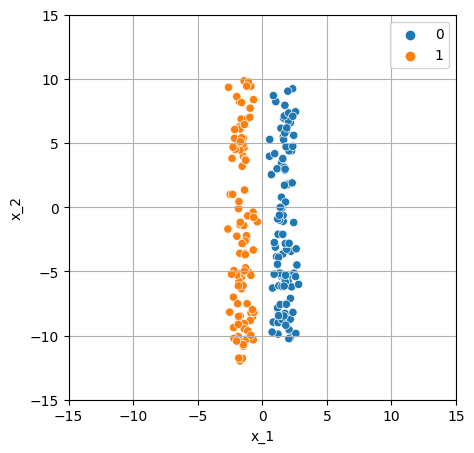

In [ ]:
plot_data_points(X, y, xlim=(-15, 15), ylim=(-15, 15))

Как видно, наши данные идеально разделяются прямой $x=0$

Функция $plot\_knn\_bound$ принимает на вход объекты $X$, метки классов $y$, метод нормализации признаков $scaler$, число соседей $n\_neighbors$ и границы рисунка $xlim$, $ylim$. Функция обучает $KNN$ классификатор с числом соседей $n\_neighbors$ и визуализирует разделяющую поверхность для классов, полученную с помощью обученного $KNN$ классификатора.

* Если вы не можете различить _выбранные нами цвета_, то измените список цветов в переменных cmap_light и cmap_bold. Актуальный список возможных цветов находится [здесь](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

def plot_knn_bound(X, y, scaler=None, n_neighbors=10, xlim=(-15, 15), ylim=(-20, 20)):
    # step size in the mesh
    h = 0.05

    # Create color maps
    cmap_light = ListedColormap(['C0', 'orange', 'cyan', 'green'][:np.unique(y).shape[0]])
    cmap_bold = ['C0', 'orange', 'c', 'darkgreen'][:np.unique(y).shape[0]]

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    X_scaled = X # if scaler is None
    if scaler is not None:
        grid = scaler.transform(grid)
        X_scaled = scaler.transform(X)

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, algorithm='brute')
    clf.fit(X_scaled, y)

    Z = clf.predict(grid)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.title('Разделющие поверхности алгоритма {}-NN'.format(n_neighbors))
    plt.grid()
    plt.show()

Нарисуем разделющие поверхности $1$-$NN$ и $10$-$NN$

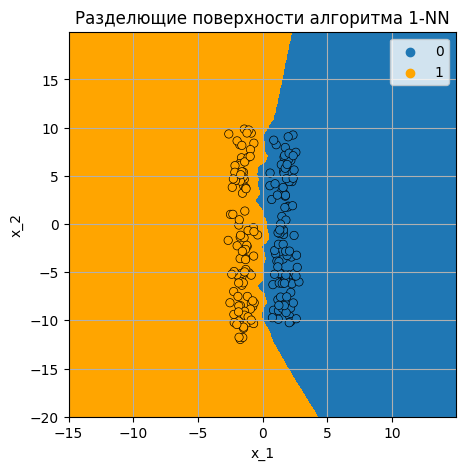

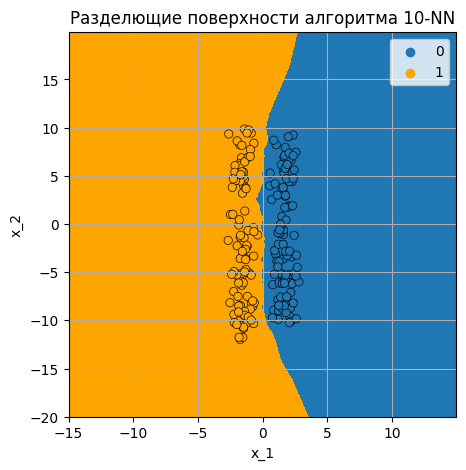

In [ ]:
plot_knn_bound(X, y, n_neighbors=1)
plot_knn_bound(X, y, n_neighbors=10)

**Задание 1.2** (кросс, 2 балла) Чем отличаются поверхности, полученные при числе соседей 1 и 10? Объясните, чем вызваны данные отличия

Разделяющая поверхность, полученная при большем числе соседей, более гладкая. Это вызвано тем, что с увеличением числа соседей на нее оказывает влияние все большее число объектов.

**Задание 1.3** (кросс, 3 балла) Объясните, почему наблюдается сильное отклоенние разделяющей поверхности от прямой $x_1=0$ при значениях $x_2 < -10$ и $x_2 > 10$. Дайте строгое математическое обоснование наблюдаемого явления, показывающее, что в Евклидовом пространстве данная проблема решается нормализацией признаков.

Отклонение наблюдается потому, что диапазон признака $x_2$ существенно превосходит диапазон признака $x_1$. Значит признак $x_2$ находится в привелигированном положении и оказывает существенно большее влияние.

Разделяющая поверхность смещается вправо, потому что в выборке при значениях $x_2 < -10$ и $x_2 > 10$ больше объектов класса $1$, чем бъектов класса $0$ .

Степень влияния признака определяется величиной его диапазона. При нормализации признаки приводятся к одному даипазону. Значит, после нормализации признаки будут оказывать равное влияние на модель.

---

Данную проблему может решить нормализация признакового пространства.

**Задание 1.4** (кросс, 1 балл) Начертите разделяющие поверхности для $KNN$, обученного на нормализованных признаках с помощью реализованных вами нормализаторов. Используйте функцию $plot\_knn\_bound$. Менять функцию $plot\_knn\_bound$ нельзя.

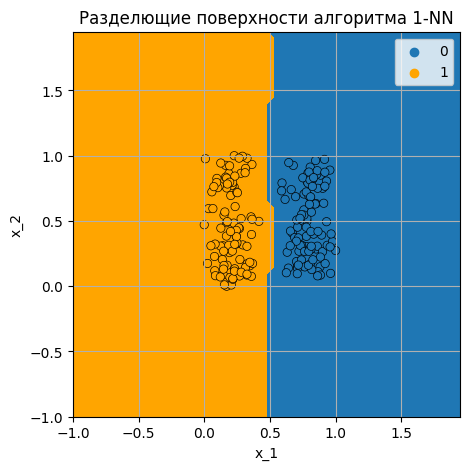

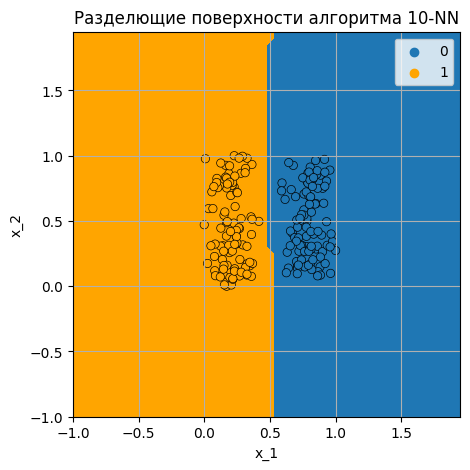

In [ ]:
scaler = MinMaxScaler()
scaler.fit(data=X)
X_scaled = scaler.transform(X)
plot_knn_bound(X_scaled, y, scaler, n_neighbors=1, xlim=(-1, 2), ylim=(-1, 2))
plot_knn_bound(X_scaled, y, scaler, n_neighbors=10, xlim=(-1, 2), ylim=(-1, 2))

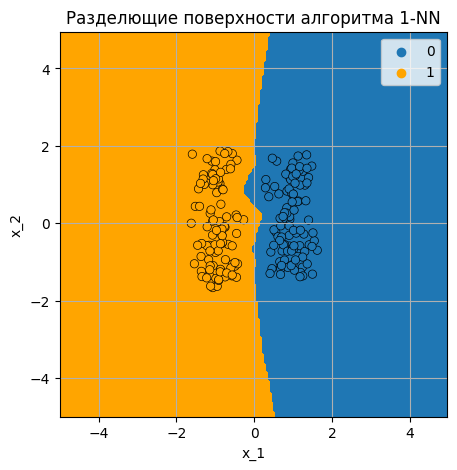

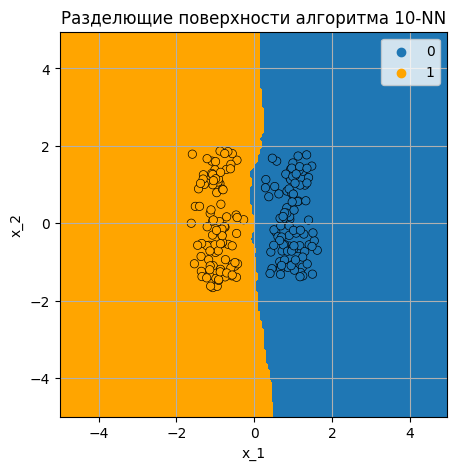

In [ ]:
scaler = StandardScaler()
scaler.fit(data=X)
X_scaled = scaler.transform(X)
plot_knn_bound(X_scaled, y, n_neighbors=1, xlim=(-5, 5), ylim=(-5, 5))
plot_knn_bound(X_scaled, y, n_neighbors=10, xlim=(-5, 5), ylim=(-5, 5))

**Задание 1.5** (кросс, 4 балла) Пусть дано произвольное число точек на плоскости. Представим, что каждая точка - это отдельный класс. Пусть на данной выборке был обучен $1-NN$ классификатор. Чем с геометрической точки зрения являются разделяющие поверхности этого классификатора? Требуется математически строго, однозначно и с полным обоснованием определить геометрическое место точек разделяющих поверхностей.

В качестве примера ниже представлена визуализация для четырех точек

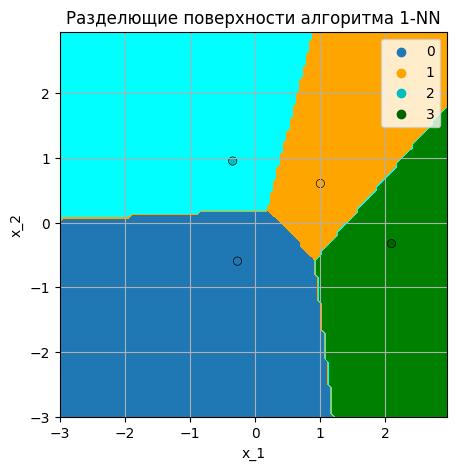

In [ ]:
X = np.random.randn(4, 2)
y = np.arange(4)
plot_knn_bound(X, y, n_neighbors=1, xlim=(-3, 3), ylim=(-3, 3))

С геометрической точки зрения разделяющие поверхности данного классификатора являются многоугольниками или ломаными.

Доказательство:

Алгоритм разбиения разделяющих поверхностей совпадает с алгоритмом построения Диаграммы Вронского.

>Диаграмма Вороного конечного множества точек $S$ представляет такое разбиение плоскости, при котором каждая область этого разбиения образует множество точек, более близких к одному из элементов множества $S$.

Рассмотрим серединный перпендикуляр отрезка, соединяющего некоторую пару точек $p$ и $q$.

Этот перпендикуляр разбивает плоскость на две полуплоскости $H_{pq}$ и $H_{qp}$, причём область Вороного точки $p$ целиком содержится в одной из них, а область точки $q$ — в другой. Область Вороного $V_{p}$ точки $p$ совпадает с пересечением всех таких полуплоскостей $H_{pq}$. Таким образом, граница области Вронского является ломаной. Построение диаграммы Вронского сводится к вычислению такого пересечения для каждой точки $p$.



# Часть 2. Кросс-валидация на задаче регрессии

При решении прикладных задач, как правило, доступна лишь обучающая выборка. Для того чтобы иметь возможность оценить качество модели на тестовой выборке, прибегают к методу, называемому `кросс-валидация`.  

Пусть зафиксирован некоторый набор гиперпараметров модели. В $KNN$ под гиперпараметрами могут пониматься число соседей, метрика близости $\rho$, стратегия выбора весов $w_i$.

* При кросс-валидации **обучающая** выборка делится на $n$ равных частей (folds).
* Затем обучаются $n$ моделей с заданными параметрами (у всех моделей параметры одинаковые и фиксированы) - $i$-ая модель обучается на всей обучающей выборке, кроме объектов, которые попали в $i$-ый фолд (out-of-fold).
* Затем измеряется качество $i$-ой модели на $i$-ом фолде. Так как он не участвовал в обучении этой модели, то полученная оценка качества модели будет являться корректной.
* Финальным значением метрики качества для модели с заданными параметрами является *среднее полученных нами значений* на $n$ фолдах.



*Подумайте, как в описанную выше схему корректно добавить обучение нормализаторов*



Принцип работы кросс-валидации схематично изображен на рисунке.

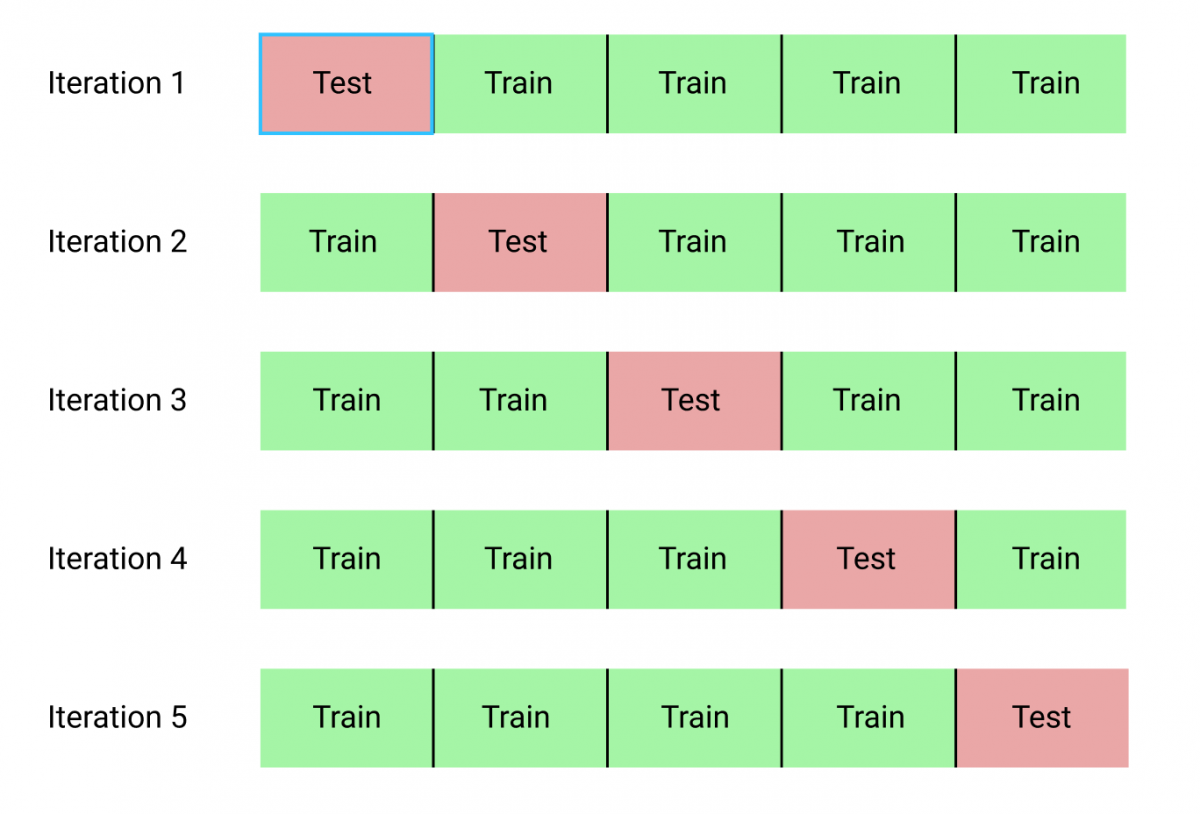

Небольшое видео объяснение о том, как работает кросс-валидация, можно посмотреть по [ссылке](https://www.youtube.com/watch?v=fSytzGwwBVw)

-----------
<font color="white" style="opacity:0.2023"></font>

**Задание 2.1** (юнит-тесты, 12 баллов) В модуле cross\_val.py реализуйте функции

* $kfold\_split$, которая реализует генерацию индексов обучающей и валидационной выборок для кросс-валидации
* $knn\_cv\_score$, которая реализует кросс-валидацию для $KNN-$модели
   
Примеры запусков функций можно увидеть в открытых тестах.

In [ ]:
with open('/content/data.pkl', 'rb') as file:
    X, y = pickle.load(file)

----

Далее будем решать задачу предсказания цены дома в Калифорнии с помощью $KNN$-регрессии. В качестве метрики качества будем использовать $R^2-$score.

$R^2(y\_true, y\_predict) = 1 - \frac{\sum_{i=1}^{n} (y\_true_i - y\_predict_i)^2}{\sum_{i=1}^{n} (y\_true_i - E(y\_true_i))^2}$

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [ ]:
X, y = fetch_california_housing(return_X_y=True)

**Задание 2.2** (кросс, 2 балла) Разбейте выборку на обучающую (75%) и тестовую (25%) с помощью функции $train\_test\_split$. Используйте параметр **random_state=42!** Не забудьте перемешать данные перед разбиением (см. параметры функции). Запустите кросс-валидацию на 3 фолдах с помощью реализованных вами функций $kfold\_split$, $knn\_cv\_score$. В качестве метрики используйте $r2\_score$. Модуль $KNN$-регрессии следует импортировать из sklearn.neighbors. Параметры для перебора описаны ниже

In [ ]:
from sklearn.metrics import r2_score

parameters = {
    'n_neighbors': [1, 5, 10],
    'metrics': ['euclidean', 'cosine'],
    'weights': ['uniform', 'distance'],
    'normalizers': [(None, 'None'), (MinMaxScaler(), 'MinMax'), (StandardScaler(), 'Standard')]
}
score_function = r2_score

**<font color=red>После того, как вы локально реализовали и протестировали модуль cross_val.py, загрузите его в сессионное хранилище: нажмите знак папки слева, затем знак загрузки</font>**

In [ ]:
from cross_val import kfold_split, knn_cv_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [ ]:
folds = kfold_split(len(X_train), 3)
out=knn_cv_score(X_train, y_train, parameters, score_function, folds, neighbors.KNeighborsRegressor)

**Задание 2.3** (кросс, 2 балла) Какой наибольший $r2\_score$ удалось достичь на валидации? Какие закономерности вы видите? Обучите модель с наилучшими параметрами на всей обучающей выборке, измерьте $r2\_score$ на тестовой выборке.


Выведите результаты кросс-валидации

In [ ]:
import pandas as pd
out_parsed = [list(key) + [out[key]] for key in out ]
out_parsed = pd.DataFrame(out_parsed, columns = ['normalizer', 'n_neighbors', 'metric', 'weights', 'score'])
out_parsed.sort_values('score', ascending=False)

,normalizer,n_neighbors,metric,weights,score
21,MinMax,10,euclidean,distance,0.703532
17,MinMax,5,euclidean,distance,0.696475
20,MinMax,10,euclidean,uniform,0.695557
33,Standard,10,euclidean,distance,0.691615
16,MinMax,5,euclidean,uniform,0.691562
32,Standard,10,euclidean,uniform,0.686047
29,Standard,5,euclidean,distance,0.683423
35,Standard,10,cosine,distance,0.682947
28,Standard,5,euclidean,uniform,0.679357
34,Standard,10,cosine,uniform,0.676589


In [ ]:
out_parsed.groupby(['weights'], group_keys=False)['score'].mean()

weights
distance    0.462315
uniform     0.454757
Name: score, dtype: float64

Лучший результат удалось достичь с параметрами ($MinMax, 10,	euclidean,	distance$).

Можно заметить следующее:
- с ростом числа соседей качество модели скорее растет;
- нормализаторы позволяют значительно повысить качество модели (наилучшае результаты достигаются с норммализатором $MinMax$);
- использование весов практически не оказывает влияния.

Обучите модель с лучшими по валидации параметрами на обучающей выборке

In [ ]:
reg = neighbors.KNeighborsRegressor(n_neighbors=10, metric='euclidean', weights='distance')

scaler = MinMaxScaler()
scaler.fit(X_train)
train_norm = scaler.transform(X_train)
test_norm = scaler.transform(X_test)

reg.fit(train_norm, y_train)
y_predict = reg.predict(test_norm)
r2_score(y_true=y_test, y_pred=y_predict)

0.7117082182374788

----------------
<font color="white" style="opacity:0.2023"></font>

# Часть 3. Работа с текстовыми данными

Далее будем решать задачу классификации новостного текста к одному из 20 классов, каждый класс соответствует определенной новостной тематике. В качестве метрики качества будем использовать $accuracy\_score$. Accuracy - это доля верно классифицированных объектов, среди всех объектов выборки.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
X_train, y_train = fetch_20newsgroups(subset='train', return_X_y=True, random_state=42)
X_test, y_test = fetch_20newsgroups(subset='test', return_X_y=True, random_state=42)

In [ ]:
print(X_train[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [ ]:
X_train = np.array(X_train, dtype=object)

In [ ]:
X_test = np.array(X_test, dtype=object)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

Как мы видим, объектами обучающей выборки являются тексты. Сырые текстовые данные не могут служить обучающими примерами для алгоритма $KNN$. Перед использованием $KNN$ текстовые данные переменной длины необходимо отобразить в числовой вектор фиксированной размерности.

Работа с текстовыми данными проходит в несколько этапов.

* **Токенизация.** Текстовая строка делится на токены. Как правило, в качестве токенов выступают отдельные слова и знаки препинания.

* **Нормализация.** Приведение к нижнему регистру, удаление стоп-слов, удаление пунктуации, удаление редких и частотных слов и т.д.

* **Векторизация.** Фиксируется словарь токенов $V$ по **обучающей** выборке. Текст представлется в виде вектора длиной $|V|$, где каждый признак есть функция от частоты встречаемости токена в тексте и в обучающей выборке.

В данном задании будет использовано два вида векторизации. Первый, $CountVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа. Второй, $TfidfVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа умноженную на величину обратно пропорциональную частоте встречаемости токена во всех документах **обучающей** выборки. Подробне про $tf-idf$ можно прочитать [здесь](https://ru.wikipedia.org/wiki/TF-IDF). Более подробно про работу с текстами можно прочитать в [статье](https://habr.com/ru/companies/otus/articles/687796/) на Хабре и в [NLTK Book](https://www.nltk.org/book/).

В sklearn все векторизаторы автоматически токенизируют текст и приводят его к нижнему регистру. Параметры $max\_df$ и $min\_df$ позволяют убрать из словаря наиболее частые и наиболее редкие токены. Параметр $stop\_words$ позволяет убрать из словаря стоп-слова (малоинформативные слова для данного языка, например, союзы).

In [ ]:
count_vec = CountVectorizer(max_df=0.8, min_df=10, max_features=1000, stop_words='english')
tf_idf = TfidfVectorizer(max_df=0.8, min_df=10, max_features=1000, stop_words='english')

**Задание 3.1** (кросс, 2 балла) Найдите оптимальные параметры обучения модели. Осуществлять перебор параметров следует по заданной ниже сетке. Используйте реализованные вами функции $kfold\_split$, $knn\_cv\_score$. В качестве метрики используйте $accuracy\_score$. 3х фолдов для кросс-валидации будет достаточно.

In [ ]:
from sklearn.metrics import accuracy_score

parameters = {
    'n_neighbors': [i for i in range(1, 11)],
    'metrics': ['cosine'],
    'weights': ['uniform', 'distance'],
    'normalizers': [(count_vec, 'CountVectorizer'), (tf_idf, 'TfidfVectorizer')]
}

Если вы все сделаете правильно, то запущенная вами кросс-валидация будет работать примерно 7 минут. Дождитесь ее завершения, не закрывайте и не перезагружайте этот colab ноутбук.

In [ ]:
folds = kfold_split(len(X_train), 3)
out = knn_cv_score(X=X_train, y=y_train, parameters=parameters, score_function=accuracy_score, folds=folds, knn_class=neighbors.KNeighborsClassifier)

**Задание 3.2** (кросс, 2 балла) Какой метод предобработки данных в среднем дает наилучший результат? Почему?

In [ ]:
out_parsed = [list(key) + [out[key]] for key in out ]
out_parsed = pd.DataFrame(out_parsed, columns = ['vectorizer', 'n_neighbors', 'metric', 'weights', 'score'])
#out_parsed.sort_values('score', ascending=False)

In [ ]:
out_parsed.groupby(['vectorizer'], group_keys=False)['score'].mean()

vectorizer
CountVectorizer    0.638736
TfidfVectorizer    0.662644
Name: score, dtype: float64

В среднем лучший результат дает метод предобработки $TfidfVectorizer$.

Это можно объяснить тем, что, в отличае от $CountVectorizer$, $TfidfVectorizer$ дополнительно масштабирует данные. Большой вес получают слова с высокой частотой в пределах конкретного документа и с низкой частотой употреблений в других документах. Таким образом, данный метод уменьшает вклад слов, которые сами по себе часто встречаются в языке, а потому не несут особой информации.

**Задание 3.3** (кросс, 2 балла) Начертите график зависимости метрики качества от числа соседей. Метрику следует усреднить по всем параматрам, кроме числа соседей. Сделайте выводы о наблюдаемых зависимостях (возможно будет полезным ознакомиться с названиями классов)

In [ ]:
data = out_parsed.groupby('n_neighbors', group_keys=False)['score'].mean()

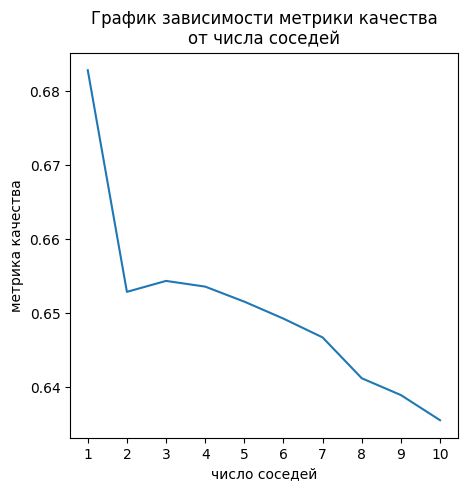

In [ ]:
plt.plot(data)
plt.xticks(np.arange(1, 11))
plt.ylabel('метрика качества')
plt.xlabel('число соседей')
plt.title('График зависимости метрики качества\nот числа соседей')
plt.show()

Метрика качества значительно убывает с увеличением числа соседей. Это объясняется тем, что классы похожи по содержанию, потому учет ольшего числа соседей приводит к лишним шумам.

**Задание 3.4** (кросс, 3 балла) Оцените точность вашей лучшей модели на тестовой части датасета. Отличается ли оно от качества, полученного на кросс-валидации? Почему? При ответе на поставленные вопросы вам поможет анализ распределений обучающей и тестовой выборок

In [ ]:
# определим лучшую модель
out_parsed.sort_values('score', ascending=False).head()

,vectorizer,n_neighbors,metric,weights,score
20,TfidfVectorizer,1,cosine,uniform,0.693653
23,TfidfVectorizer,2,cosine,distance,0.693653
21,TfidfVectorizer,1,cosine,distance,0.693653
25,TfidfVectorizer,3,cosine,distance,0.691797
27,TfidfVectorizer,4,cosine,distance,0.689588


In [ ]:
reg = neighbors.KNeighborsClassifier(n_neighbors=1, metric='cosine', weights='distance')

scaler = tf_idf
scaler.fit(X_train)
train_norm = scaler.transform(X_train)
test_norm = scaler.transform(X_test)

reg.fit(train_norm, y_train)
y_predict = reg.predict(test_norm)
accuracy_score(y_true=y_test, y_pred=y_predict)

0.5315985130111525

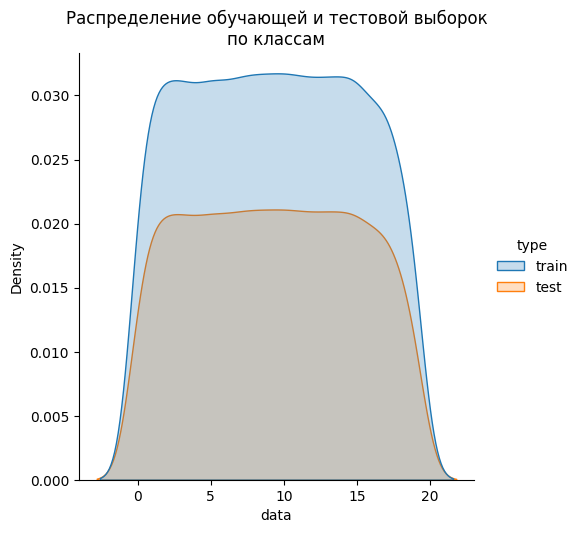

In [ ]:
import seaborn as sns
data = pd.DataFrame({'data' : list(y_train)+list(y_test), 'type': ['train'] * len(y_train) + ['test'] * len(y_test)})
sns.displot(data = data, x='data', hue = 'type', kind = 'kde', fill = True)
plt.title('Распределение обучающей и тестовой выборок\nпо классам')
plt.show()

Да, качество значительно упало, тем не менее тестовая и обучающая выборки имеют одинаковые распределения по классам. Это значит, что существуют различия между распределениями объектов тестовой и обучающей выборок внутри классов.